# Audio (.wav) files Exploratory Data Analysis (EDA)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydub import AudioSegment
import os
import wave
import librosa
import librosa.display

In [56]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [57]:
# os.getcwd()

In [58]:
# Load files
audio_segment = AudioSegment.from_file("audio/CantinaBand60.wav")
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 22050
Frame width: 2
Length (ms): 60000
Frame count: 1323000.0
Intensity: -26.93315829291072


In [59]:
# Open wav file and read frames as bytes
sf_filewave = wave.open('audio/CantinaBand60.wav', 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))

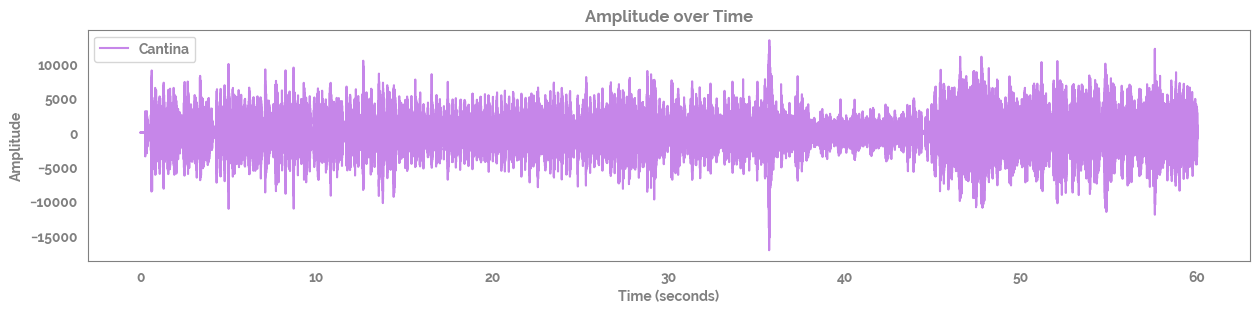

In [60]:
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
_ = plt.title('Amplitude over Time')
_ = plt.ylabel('Amplitude')
_ = plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax.plot(time_sf, soundwave_sf, label='Cantina', alpha=0.5)
_ = plt.legend()

In [61]:
audio_data = 'audio/CantinaBand60.wav'
x, sr = librosa.load(audio_data)
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

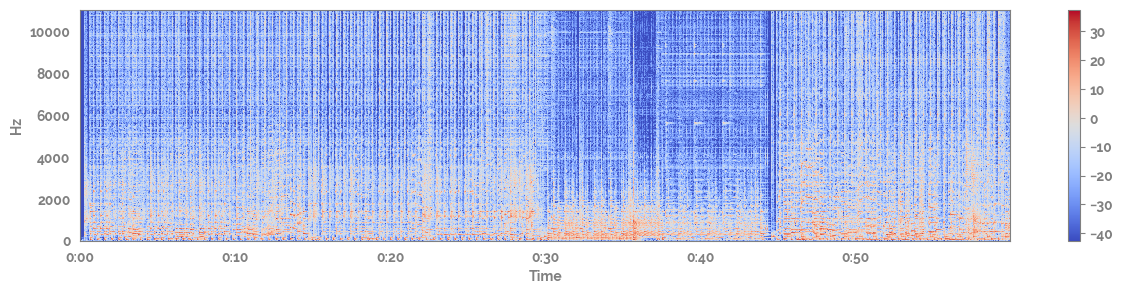

In [62]:
_ = plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
_ = plt.colorbar()

In [63]:
y, sr = librosa.load(audio_data)
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

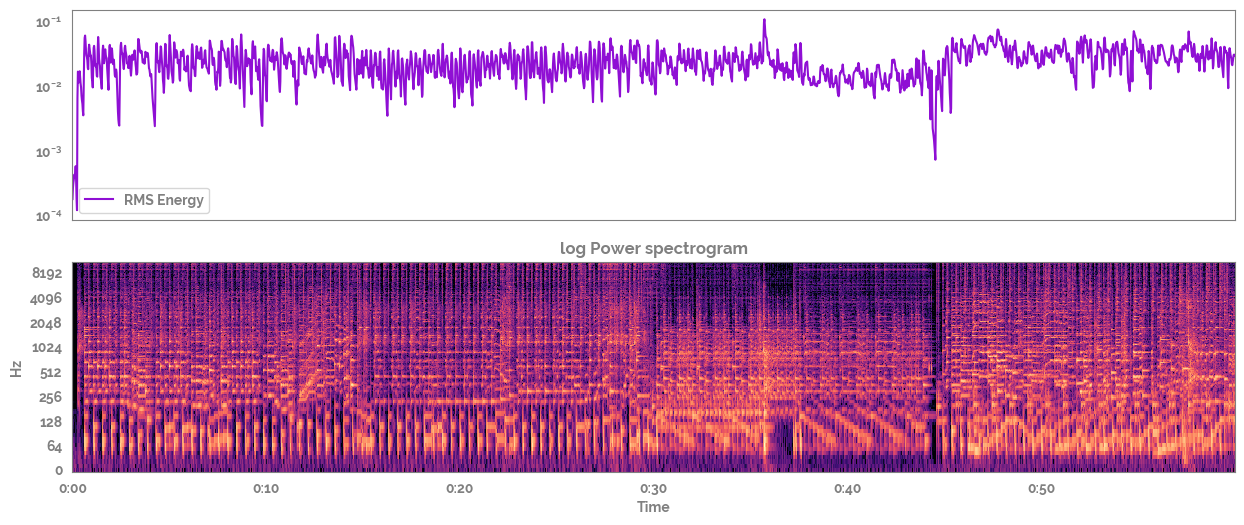

In [64]:
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
_ = ax[1].set(title='log Power spectrogram')

In [65]:
y, sr = librosa.load(audio_data)
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")

Zero crossing rate: 161688


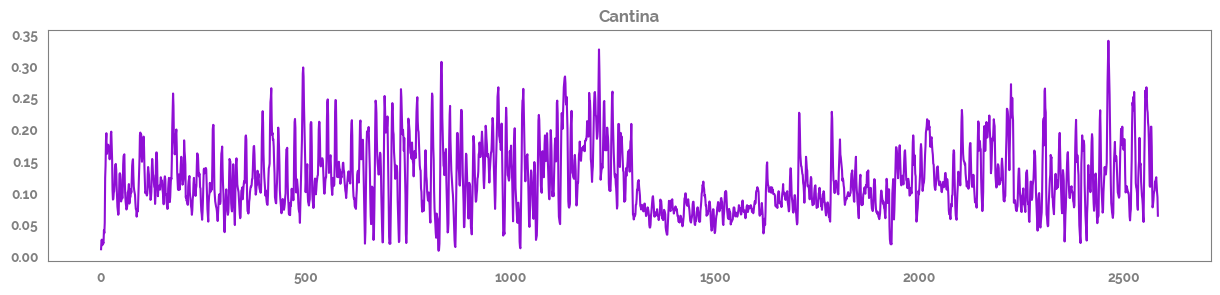

In [66]:
_ = plt.figure(figsize=(15, 3))
_ = plt.plot(zcrs[0])
_ = plt.title('Cantina')

In [67]:
x, sr = librosa.load(audio_data)
mfccs = librosa.feature.mfcc(x, sr=sr)

/var/folders/76/w4hjx50937lb151qm8l0xq_w0000gn/T/ipykernel_34123/3226102990.py:2: FutureWarning: Pass y=[ 9.1552734e-05  2.1362305e-04  0.0000000e+00 ... -2.7313232e-02
 -2.9907227e-02 -2.4475098e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


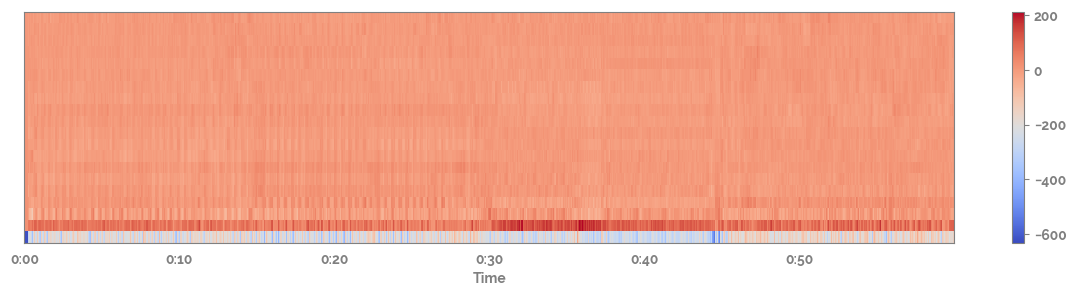

In [68]:
# Displaying  the MFCCs:
_ = plt.figure(figsize=(15, 3))
_ = librosa.display.specshow(mfccs, sr=sr, x_axis='time')
_ = plt.colorbar()

In [69]:
x, sr = librosa.load(audio_data)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)

/var/folders/76/w4hjx50937lb151qm8l0xq_w0000gn/T/ipykernel_34123/1130627501.py:3: FutureWarning: Pass y=[ 9.1552734e-05  2.1362305e-04  0.0000000e+00 ... -2.7313232e-02
 -2.9907227e-02 -2.4475098e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


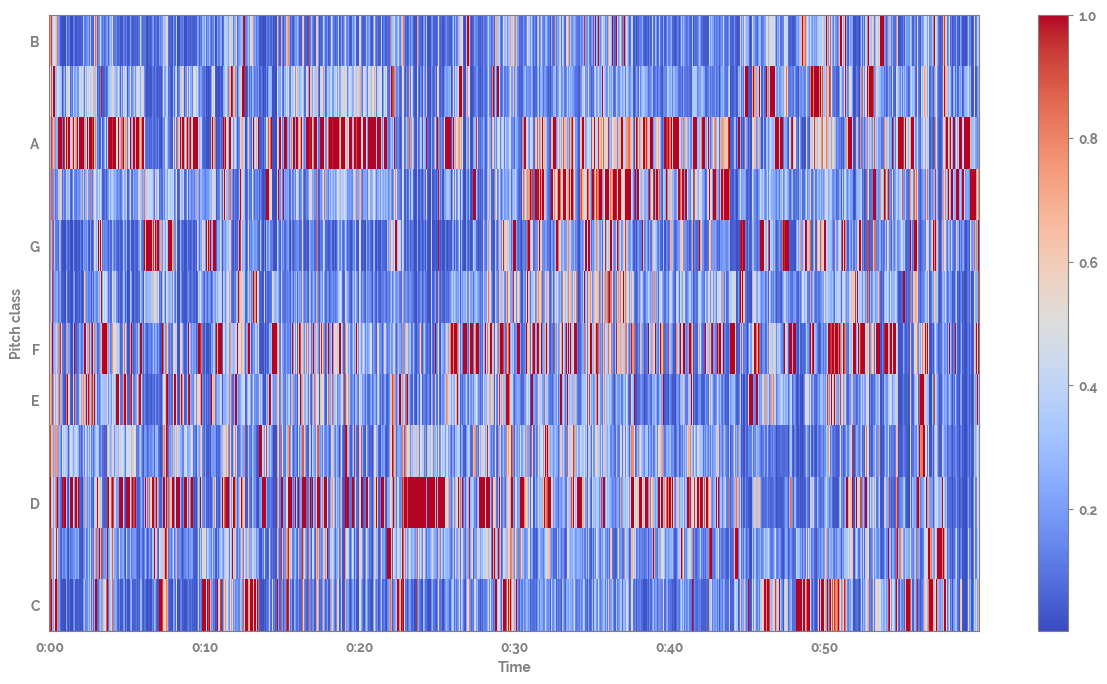

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
_ = fig.colorbar(img, ax=ax)

In [71]:
y, sr = librosa.load(audio_data)
hop_length = 512
# Compute local onset autocorrelation
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]
tempo

129.19921875

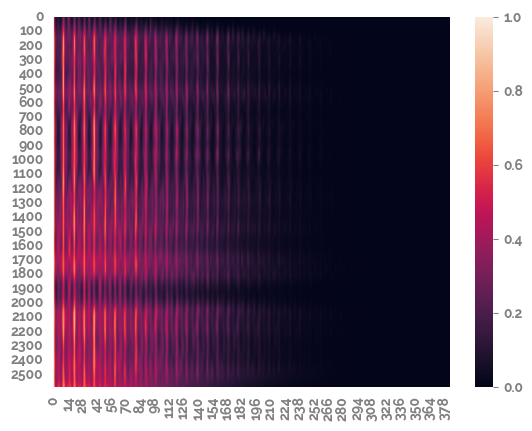

In [72]:
_ = sns.heatmap(tempogram.T)